# University of Michigan - Robotics
# ROB 101, Fall 2021, Computational Linear Algebra
Credits: <https://www.youtube.com/playlist?list=PLdPQZLMHRjDJ5d_dE4FeOviv0gRe4UYsB>

## Declaring matricies, vectors and manipulate

In [1]:
# We define some vectors and matrices
row_vec = [1 3 5 7 9]
almost_zero_vec = [0; 0; -pi; 0; 0; 0; 0]
using Random  # Using an external package called Random which provides functions
Random.seed!(1234)  # Set the seed so that the code is debuggable
rand_matrix = rand(3, 4)

3×4 Matrix{Float64}:
 0.579862  0.0149088  0.839622  0.946453
 0.411294  0.520355   0.967143  0.574323
 0.972136  0.639562   0.131026  0.67765

In [2]:
# Select the 1st number from a row_vector
num = row_vec[1]

1

In [3]:
# Select the non-zero number from previous almost_zero_vec
num = almost_zero_vec[3]

-3.141592653589793

In [4]:
# Select the 4th column of rand_matrix
vect = rand_matrix[:, 4]

3-element Vector{Float64}:
 0.9464532262313834
 0.5743234852783174
 0.6776499075995779

In [5]:
# Select the 1st row of rand_matrix
vect = rand_matrix[1, :]

4-element Vector{Float64}:
 0.5798621201341324
 0.014908849285099945
 0.8396219340580711
 0.9464532262313834

In [6]:
# Select the 1st row of rand_matrix as a row vector
row_vec = rand_matrix[1:1, 1:end]
# 1:1 meaning selecting from row 1 to row 1 -> row 1 itself
# 1:end meaning selecting from element 1 to end of row

1×4 Matrix{Float64}:
 0.579862  0.0149088  0.839622  0.946453

In [7]:
# 1:end can be omitted for convenience
row_vec = rand_matrix[1:1, :]

1×4 Matrix{Float64}:
 0.579862  0.0149088  0.839622  0.946453

In [8]:
# Declare a matrix
A = [1 2 3 0; 4 5 6 0; 7 8 9 0; 0 0 0 0]

4×4 Matrix{Int64}:
 1  2  3  0
 4  5  6  0
 7  8  9  0
 0  0  0  0

In [9]:
# Select fist 3 rows, and first 3 elements of each row
block = A[1:3, 1:3]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [10]:
# small_block is treated as a 1 by 1 matrix by Julia
# in order to access the scalar value, we have to use the index operator
small_block = block[2:2, 2:2]

1×1 Matrix{Int64}:
 5

In [11]:
block[2, 2]

5

In [12]:
pi/small_block[1]

0.6283185307179586

In [13]:
col_vec = [0; 2; 4; 6; 8]
col_vec_transposed = col_vec'

1×5 adjoint(::Vector{Int64}) with eltype Int64:
 0  2  4  6  8

In [14]:
row_vec = rand_matrix[1, 1:end]'

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.579862  0.0149088  0.839622  0.946453

## For loops in Julia with matrices

In [15]:
# Declare a 3-by-3 matrix
A = [1 8 2; 0 3 7; 6 2 9]

3×3 Matrix{Int64}:
 1  8  2
 0  3  7
 6  2  9

In [16]:
# Compute the sum of the entries on the primary diagonal of A
sum = A[1, 1] + A[2, 2] + A[3, 3]

13

In [17]:
# Print the numbers from 1 to 10
for k in 1:10
    println(k)
end

1
2
3
4
5
6
7
8
9
10


If the range is defined as a set of numbers, the following syntax is also valid

```
for iterator = start:step:stop
    statements to do stuff
end
```

In [18]:
# Print the even numbers from 2 to 20
# inclusive
for k = 2:2:20
    println(k)
end

2
4
6
8
10
12
14
16
18
20


In [19]:
using Random
Random.seed!(1234)
A = rand(30, 30)

30×30 Matrix{Float64}:
 0.579862   0.00543656  0.126386  …  0.571334   0.328323   0.673974
 0.411294   0.698478    0.965243     0.124163   0.349247   0.245734
 0.972136   0.349231    0.515818     0.587931   0.793972   0.316147
 0.0149088  0.91097     0.488476     0.321161   0.0952038  0.585489
 0.520355   0.973653    0.527837     0.531414   0.665992   0.852246
 0.639562   0.76066     0.917137  …  0.59433    0.799811   0.580852
 0.839622   0.488912    0.706951     0.290677   0.171014   0.183946
 0.967143   0.362643    0.753203     0.855815   0.689584   0.202328
 0.789764   0.708738    0.573645     0.555287   0.270649   0.488165
 0.696041   0.656694    0.731872     0.861586   0.480495   0.988048
 0.566704   0.173863    0.829076  …  0.711169   0.745688   0.405814
 0.536369   0.69736     0.892646     0.698374   0.0675589  0.661413
 0.711389   0.191723    0.806471     0.599969   0.661991   0.520162
 ⋮                                ⋱                        
 0.715355   0.0177509   0.994935 

In [20]:
# Compute the sum of the entries on the primary diagonal
sum = 0
for k = 1:30
    sum += A[k, k]
end
println(sum)

15.828121297692357


In [21]:
# Declare a 3-by-3 matrix
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [22]:
for i = 1:3
    for j = 1:i
        println(A[i, j])
    end
end

1
4
5
7
8
9


## Solve a simple system of linear equations

In [23]:
# Declare a 3-by-3 matrix
A = [1 3 6; 0 6 1; 7 8 2]
b = [-2; 11; 6.4]
# Compute the solution of Ax = b
using LinearAlgebra
x = inv(A) * b

3-element Vector{Float64}:
 -1.069603524229075
  2.028193832599119
 -1.1691629955947136

## Area of a shape via triangles

Divide the shape into triangles and add up the area of each triangle.

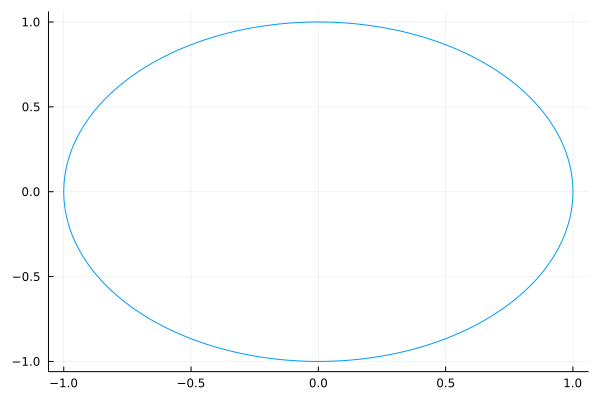

In [24]:
# Plot a circle
using LinearAlgebra
using Plots
th = [-pi: 0.01: pi;]
X = cos.(th)
Y = sin.(th)
plot(X, Y, legend=false, aspectration=:equal)